In [1]:
!pip install osmnx

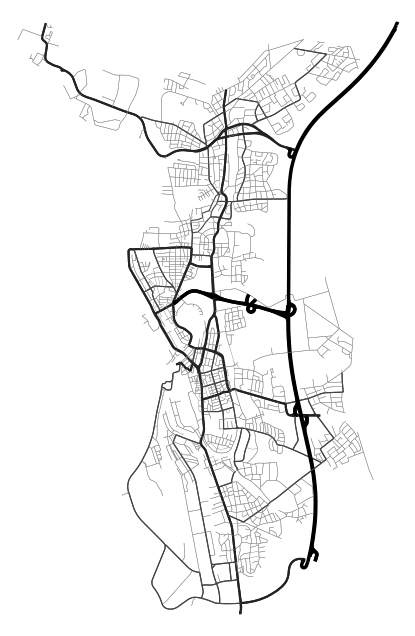

In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd # Moved this import to the top

# 1. Stadt definieren
place_name = "Bremerhaven, Germany"

# 2. Graph laden
graph = ox.graph_from_place(place_name, network_type='drive')

tags = {"railway": "tram"}

try:
    trams = ox.features_from_place(place_name, tags)
except ox._errors.InsufficientResponseError: # Catch the imported error directly
    # Create an empty GeoDataFrame if no trams are found to avoid further errors
    trams = gpd.GeoDataFrame()

# 3. Logik für Dicke und Farbe definieren
def get_edge_style(highway_type):
    # Hauptstraßen (Motorway, Trunk) - Tiefschwarz und dick
    if 'motorway' in str(highway_type) or 'trunk' in str(highway_type):
        return 2.5, '#000000'
    # Wichtige Stadtstraßen (Primary, Secondary) - Schwarz und mittel
    elif 'primary' in str(highway_type) or 'secondary' in str(highway_type):
        return 1.5, '#222222'
    # Kleinere Erschließungsstraßen (Tertiary) - Dunkelgrau und dünner
    elif 'tertiary' in str(highway_type):
        return 0.8, '#444444'
    # Alles andere (Wohnstraßen, Gassen) - Hellgrau und hauchdünn
    else:
        return 0.3, '#888888'

# 4. Listen für Dicke und Farbe erstellen
widths = []
colors = []

for u, v, k, data in graph.edges(data=True, keys=True):
    w, c = get_edge_style(data['highway'])
    widths.append(w)
    colors.append(c)

# 5. Plotten mit beiden Listen
fig, ax = ox.plot_graph(
    graph,
    node_size=0,
    edge_color=colors,     # Liste mit Farwerten
    edge_linewidth=widths, # Liste mit Stärken
    bgcolor='white',
    show=False,
    close=False
)

# 5. Straßenbahnen hinzufügen
# Wir prüfen, ob überhaupt Tram-Daten gefunden wurden
if not trams.empty:
    # Wir filtern nur Linienobjekte (LineString/MultiLineString)
    trams.plot(ax=ax, color='red', linewidth=1, alpha=1.0, zorder=3)

# 6. Export als hochauflösendes Bild oder PDF
# PDF ist ideal, wenn du das Bild später ohne Qualitätsverlust drucken willst.
fig.savefig("stadt.png", dpi=600, bbox_inches='tight')
#fig.savefig("stadt_design.pdf", bbox_inches='tight')

#from google.colab import files
#files.download("stadt1.png")

plt.show()